E-commerce data
---
This e-commerce dataset offers a detailed view of customer demographics, purchase behavior, and decision-making patterns. It includes features like purchase frequency, brand loyalty, satisfaction scores, and external influences such as social media and discounts. These variables enable targeted marketing, customer segmentation, and fairness-aware recommendation system development.

Importing all necessary libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
file_path = r"C:\Users\vahav\OneDrive - HvA\Courses\System Development for Marketing\E-commerce\Ecommerce_Consumer_Behavior_Analysis_Data.csv"
e_commerce = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)

(e_commerce.head())

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,4,Mixed,5,5,2.0,NaN,Somewhat Sensitive,1,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


Data consists of unique combinations of customers and purchases, where:
- Customer_ID: Unique identifier for each customer.
- Product_Rating: Rating given by the customer to a purchased product (1-5 scale).

Looking up the data types:

In [3]:
print("\nDataframe info:")
e_commerce.info()


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   i

In [4]:
e_commerce['Purchase_Amount'] = e_commerce['Purchase_Amount'].replace(r'[\$,]', '', regex=True).astype(float)

Checking for missing values

In [5]:
# Check for missing values in each column
missing_values = e_commerce.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Customer_ID                                0
Age                                        0
Gender                                     0
Income_Level                               0
Marital_Status                             0
Education_Level                            0
Occupation                                 0
Location                                   0
Purchase_Category                          0
Purchase_Amount                            0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   247
Discount_Sensitivity                       0
Return_Rate                                0
Customer_Satisfaction                      0
Engagement_with_Ads                      256
Device_Used_for_Shopping                   0
Payment_Method          

In [6]:
unique_engagement = e_commerce['Engagement_with_Ads'].unique()
unique_social_media = e_commerce['Social_Media_Influence'].unique()

print("Unique values in Engagement_with_Ads:")
print(unique_engagement)

print("\nUnique values in Social_Media_Influence:")
print(unique_social_media)

Unique values in Engagement_with_Ads:
[nan 'High' 'Low' 'Medium']

Unique values in Social_Media_Influence:
[nan 'Medium' 'Low' 'High']


Cleaning the "nan" values:

In [7]:
# Convert 'NaN', 'nan', or '' to genuine NaNs
e_commerce['Engagement_with_Ads'] = e_commerce['Engagement_with_Ads'].replace(['NaN', 'nan', ''], np.nan)
e_commerce['Social_Media_Influence'] = e_commerce['Social_Media_Influence'].replace(['NaN', 'nan', ''], np.nan)

e_commerce['Engagement_with_Ads'] = e_commerce['Engagement_with_Ads'].fillna('None')
e_commerce['Social_Media_Influence'] = e_commerce['Social_Media_Influence'].fillna('None')

In [8]:
print("Unique values in Engagement_with_Ads:")
print(e_commerce['Engagement_with_Ads'].unique())

print("\nUnique values in Social_Media_Influence:")
print(e_commerce['Social_Media_Influence'].unique())

Unique values in Engagement_with_Ads:
['None' 'High' 'Low' 'Medium']

Unique values in Social_Media_Influence:
['None' 'Medium' 'Low' 'High']


And checking for duplicate rows:

In [9]:
duplicate_count = e_commerce.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


---
---
EDA
---

Descriptive statistics

In [10]:
print("Descriptive Statistics for Numerical Columns:")
display(e_commerce.describe())

Descriptive Statistics for Numerical Columns:


,Age,Purchase_Amount,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Time_to_Decision
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.304000,275.063880,6.945000,3.026000,3.033000,1.013030,0.954000,5.399000,7.547000
std,9.353238,131.532998,3.147361,1.416803,1.436654,0.791802,0.810272,2.868454,4.035849
min,18.000000,50.710000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,26.000000,162.235000,4.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,34.500000,276.165000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,8.000000
75%,42.000000,388.982500,10.000000,4.000000,4.000000,2.000000,2.000000,8.000000,11.000000
max,50.000000,498.330000,12.000000,5.000000,5.000000,2.000000,2.000000,10.000000,14.000000


- Age: customers consists of a wide age range, mostly clustering around the mid-30s. There are both young adults and seniors.
- Frequency of a purchase: a mix of low-frequency and high-frequency buyers. 
- Brand loyalty: If this score is a measure of how consistently customers purchase from the same brand, about half of them have a loyalty of 2 or below.

Lets more forward to analyze key variables:
- user_id (unique identifier for each user)
- purchase_category (proxy for "item")
- product_rating

In [11]:
(e_commerce.shape)

(1000, 28)

In [12]:
(e_commerce.head())

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,333.80,4,Mixed,5,5,2.0,None,Somewhat Sensitive,1,7,None,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,None,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,None,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


First looking up the customer demographics:
- Gender
- Age
- Income
- Marital status
- Education level
- Occupation

In [13]:
# Check number of unique customer IDs
unique_ids = e_commerce['Customer_ID'].nunique()
total_rows = len(e_commerce)

print(f"Unique Customer IDs: {unique_ids}")
print(f"Total Rows: {total_rows}")

# Check if all Customer_IDs are unique
if unique_ids == total_rows:
    print("All Customer_IDs are unique.")
else:
    print("There are duplicate Customer_IDs.")


Unique Customer IDs: 1000
Total Rows: 1000
All Customer_IDs are unique.


From the output above we can see that all the Customer ID values are unique, meaning that there is only one purchase made from each customer in this dataset.

As we know from descriptive statistics, the minimum age of a customer, 18, and maximum age, 50, are pretty far appart. Lets create custom age-groups to show the distribution more nicely.

In [14]:
# Define age bins and labels
age_bins = [17, 25, 30, 35, 40, 45, 50]
age_labels = ['18–25', '26–30', '31–35', '36–40', '41–45', '46–50']

# Create a new column 'Age_Group' based on the bins
e_commerce['Age_Group'] = pd.cut(e_commerce['Age'], bins=age_bins, labels=age_labels)


print(e_commerce[['Age', 'Age_Group']].head())

   Age Age_Group
0   22     18–25
1   49     46–50
2   24     18–25
3   29     26–30
4   33     31–35


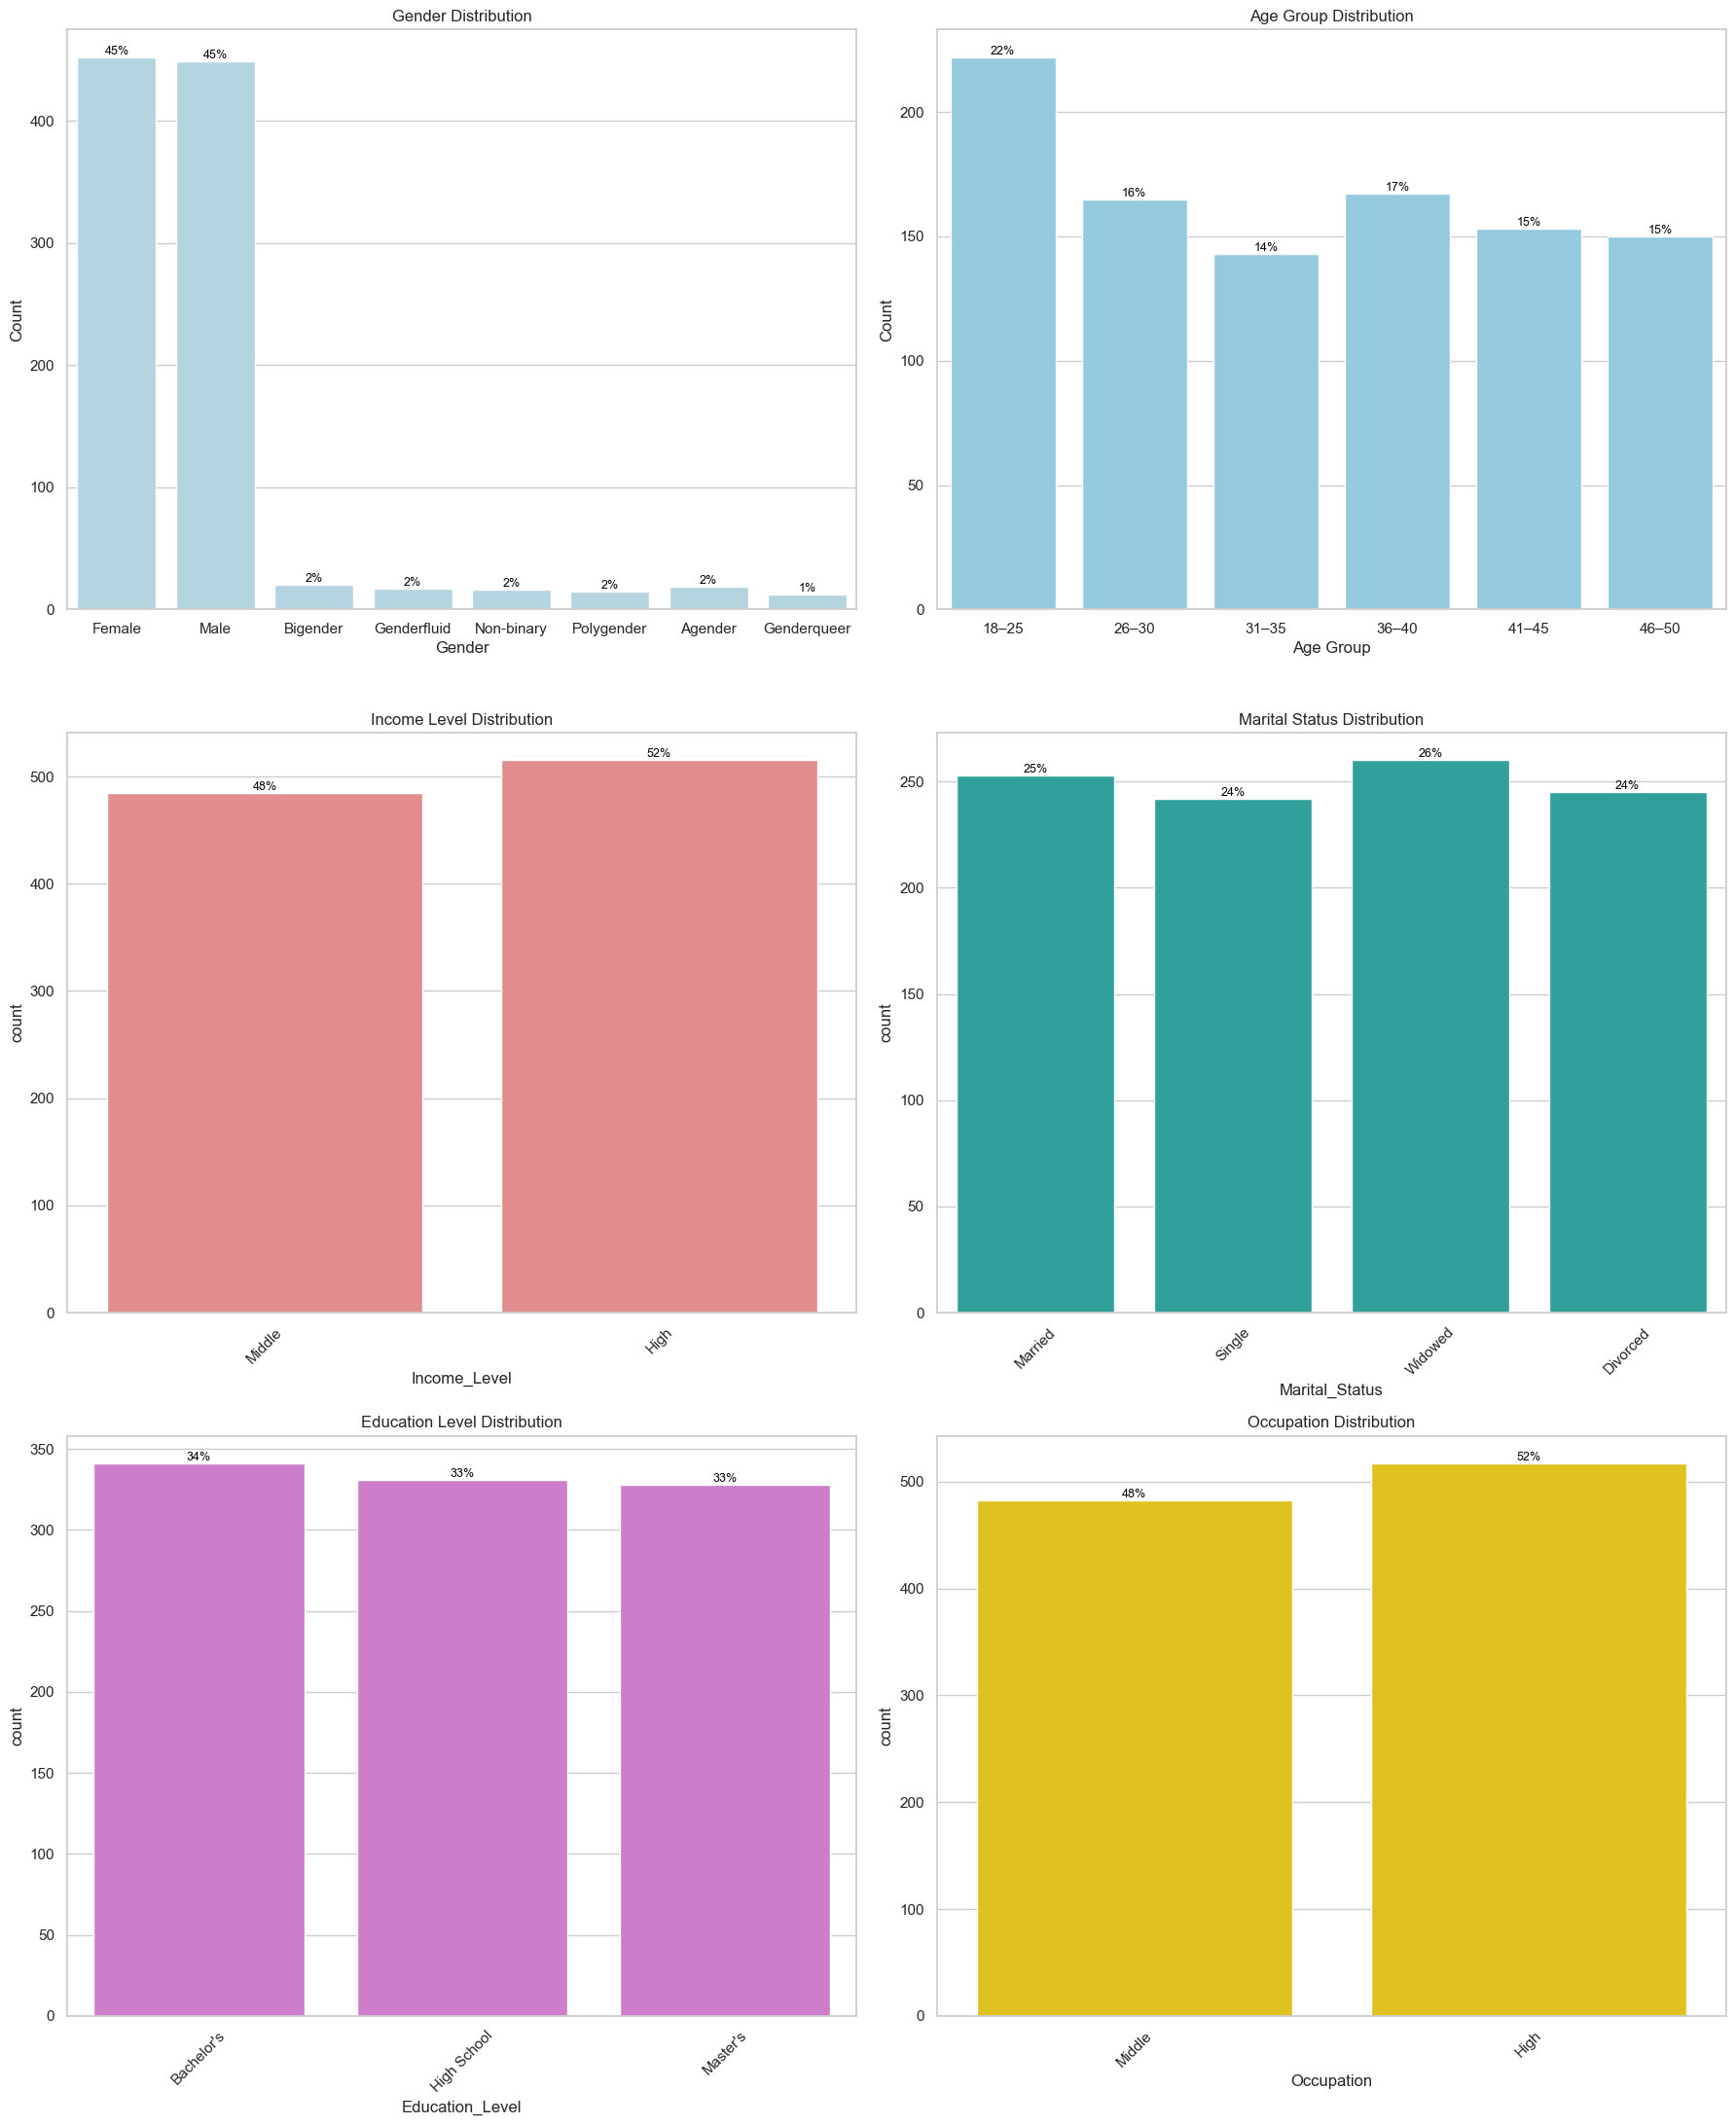

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 22))

# Helper function to add percentages
def add_percentage(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{round(100 * height / total_count)}%'
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black')

total_users = len(e_commerce)

# Plot 1: Gender Distribution
plt.subplot(3, 2, 1)
ax0 = sns.countplot(data=e_commerce, x='Gender', color='lightblue')
add_percentage(ax0, total_users)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot 2: Age Group Distribution
plt.subplot(3, 2, 2)
age_order = ['18–25', '26–30', '31–35', '36–40', '41–45', '46–50']
ax1 = sns.countplot(data=e_commerce, x='Age_Group', order=age_order, color='skyblue')
add_percentage(ax1, total_users)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Plot 3: Income Level
plt.subplot(3, 2, 3)
ax2 = sns.countplot(data=e_commerce, x='Income_Level', color='lightcoral')
add_percentage(ax2, total_users)
plt.title('Income Level Distribution')
plt.xticks(rotation=45)

# Plot 4: Marital Status
plt.subplot(3, 2, 4)
ax3 = sns.countplot(data=e_commerce, x='Marital_Status', color='lightseagreen')
add_percentage(ax3, total_users)
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)

# Plot 5: Education Level
plt.subplot(3, 2, 5)
ax4 = sns.countplot(data=e_commerce, x='Education_Level', color='orchid')
add_percentage(ax4, total_users)
plt.title('Education Level Distribution')
plt.xticks(rotation=45)

# Plot 6: Occupation
plt.subplot(3, 2, 6)
ax5 = sns.countplot(data=e_commerce, x='Occupation', color='gold')
add_percentage(ax5, total_users)
plt.title('Occupation Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Key conclusions that could be important later, when evaluating fairness in recommender system outputs:
- The gender distribution is relatively balanced, with 48% of users identifying as female and 48% as male. However, there is a much smaller representation from non-binary, agender, genderqueer, and other gender identities, which makes up a very small proportion (less than 5%). This imbalance in gender representation could lead to biased recommendations favoring binary gender groups.
- While the 18–25 group is the largest, the distribution is relatively even for the remaining age groups, and there isn’t a stark skew towards any specific age group after 18–25. However, since the youngest age group is the largest, there could still be a risk of the system prioritizing recommendations for younger users. 
- The income, marital status, education level and occupation distributions are almost the same for each represented group.

Lets continue to check the min, average, and max prodyct ratings for each group to see if they vary:


In [16]:
columns_to_check = ['Gender', 'Age_Group', 'Income_Level', 'Marital_Status', 'Education_Level', 'Occupation']

for col in columns_to_check:
    print(f"Product_Rating stats by '{col}':")
    stats = e_commerce.groupby(col)['Product_Rating'].agg(
        Min='min',
        Avg='mean',
        Max='max'
    ).round(2)
    print(stats)
    print("-" * 50)

Product_Rating stats by 'Gender':
             Min   Avg  Max
Gender                     
Agender        1  3.05    5
Bigender       1  3.35    5
Female         1  3.09    5
Genderfluid    1  2.65    5
Genderqueer    1  2.83    5
Male           1  2.96    5
Non-binary     1  3.00    5
Polygender     1  3.67    5
--------------------------------------------------
Product_Rating stats by 'Age_Group':
           Min   Avg  Max
Age_Group                
18–25        1  3.05    5
26–30        1  2.98    5
31–35        1  3.04    5
36–40        1  3.06    5
41–45        1  3.08    5
46–50        1  2.98    5
--------------------------------------------------
Product_Rating stats by 'Income_Level':
              Min   Avg  Max
Income_Level                
High            1  3.01    5
Middle          1  3.05    5
--------------------------------------------------
Product_Rating stats by 'Marital_Status':
                Min   Avg  Max
Marital_Status                
Divorced          1  3.02   

C:\Users\vahav\AppData\Local\Temp\ipykernel_56536\834538971.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = e_commerce.groupby(col)['Product_Rating'].agg(


From the outcome we can see that the average ratings per each group within different demographical information varies, but the min and max ratings are consistent (always between 1 and 5).

Some groups, such as Bigender or Married, have higher average ratings, while others, like Genderfluid or Single, have slightly lower averages. However, income level, age group, and occupation show relatively smaller differences in ratings.

---
Then moving on to look at the spending and purchase patterns:
- Purchase amount
- Purchase category
- Purchase channel
- Payment method
- Purchase amount
- Frequency of purchases

In [17]:
# Check number of unique purchases
purchase_ids = e_commerce['Purchase_Category'].nunique()
total_rows = len(e_commerce)

print(f"Unique Purchase categorys: {purchase_ids}")
print(f"Total Rows: {total_rows}")

# Check if all purchases are unique
if purchase_ids == total_rows:
    print("All Purchase_IDs are unique.")
else:
    print("There are duplicate Purchase_IDs.")

Unique Purchase categorys: 24
Total Rows: 1000
There are duplicate Purchase_IDs.


From the code above we can see that there is 24 unique purchase (or product) categories in which the customer have bought their products from. These are the names of these categories:

In [18]:
print(e_commerce['Purchase_Category'].unique())

['Gardening & Outdoors' 'Food & Beverages' 'Office Supplies'
 'Home Appliances' 'Furniture' 'Books' 'Sports & Outdoors'
 'Mobile Accessories' 'Luxury Goods' 'Animal Feed' 'Health Care' 'Hotels'
 'Packages)' 'Electronics' 'Software & Apps' 'Baby Products'
 'Toys & Games' 'Arts & Crafts' 'Health Supplements' 'Groceries'
 'Clothing' 'Beauty & Personal Care' 'Travel & Leisure (Flights'
 'Jewelry & Accessories']


C:\Users\vahav\AppData\Local\Temp\ipykernel_56536\3606767827.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


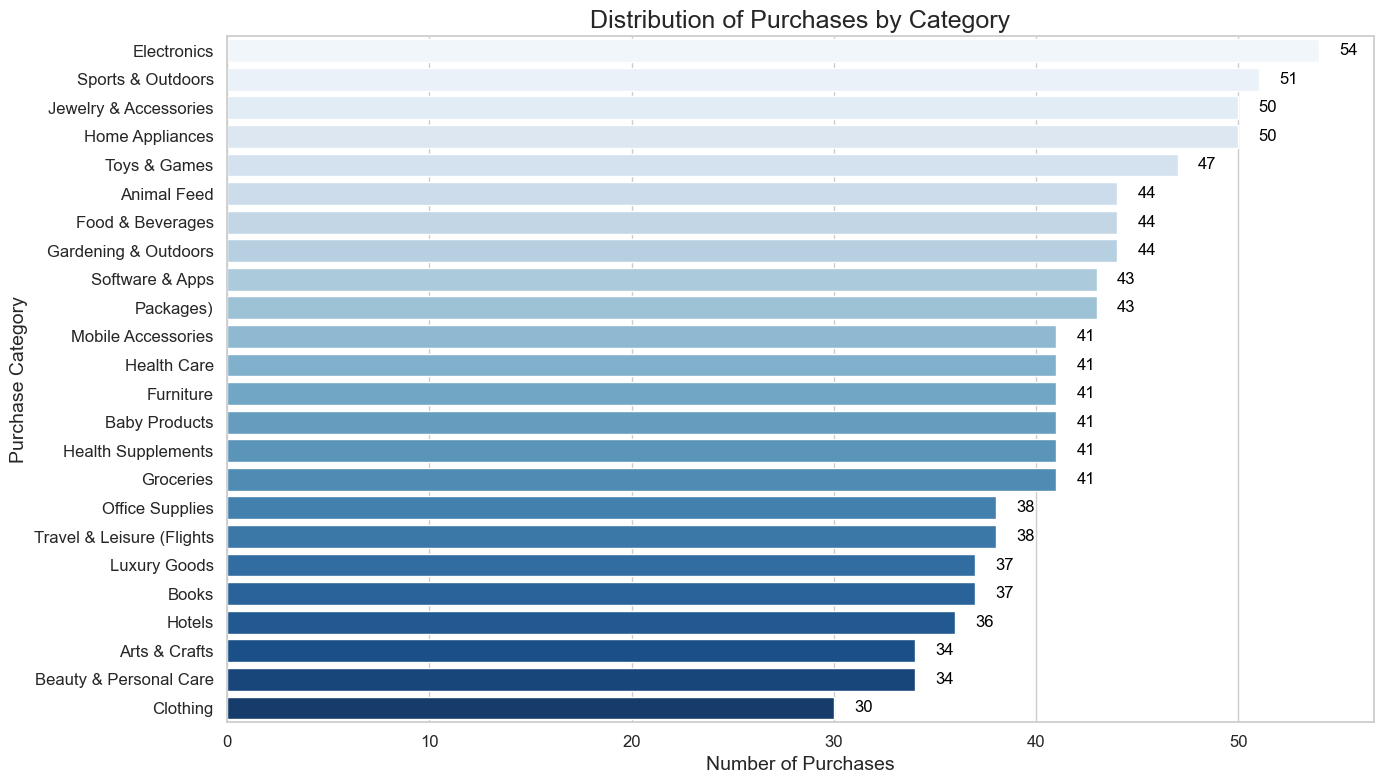

In [19]:
# Set a clean style
sns.set(style="whitegrid")

# Count the number of purchases per category
category_counts = e_commerce['Purchase_Category'].value_counts()

# Create the plot
plt.figure(figsize=(14, 8))  
ax = sns.barplot(
    x=category_counts.values,
    y=category_counts.index,
    palette='Blues'
)

# Add value labels to each bar
for i, value in enumerate(category_counts.values):
    ax.text(value + 1, i, str(value), color='black', va='center')

plt.title('Distribution of Purchases by Category', fontsize=18)
plt.xlabel('Number of Purchases', fontsize=14)
plt.ylabel('Purchase Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

As we can recall from the discriptive statistics, the min and max values of teh purchase amount and frequency varied from ~$50 to $500. Lets group some purchase amounts to show the distribution more nicely:

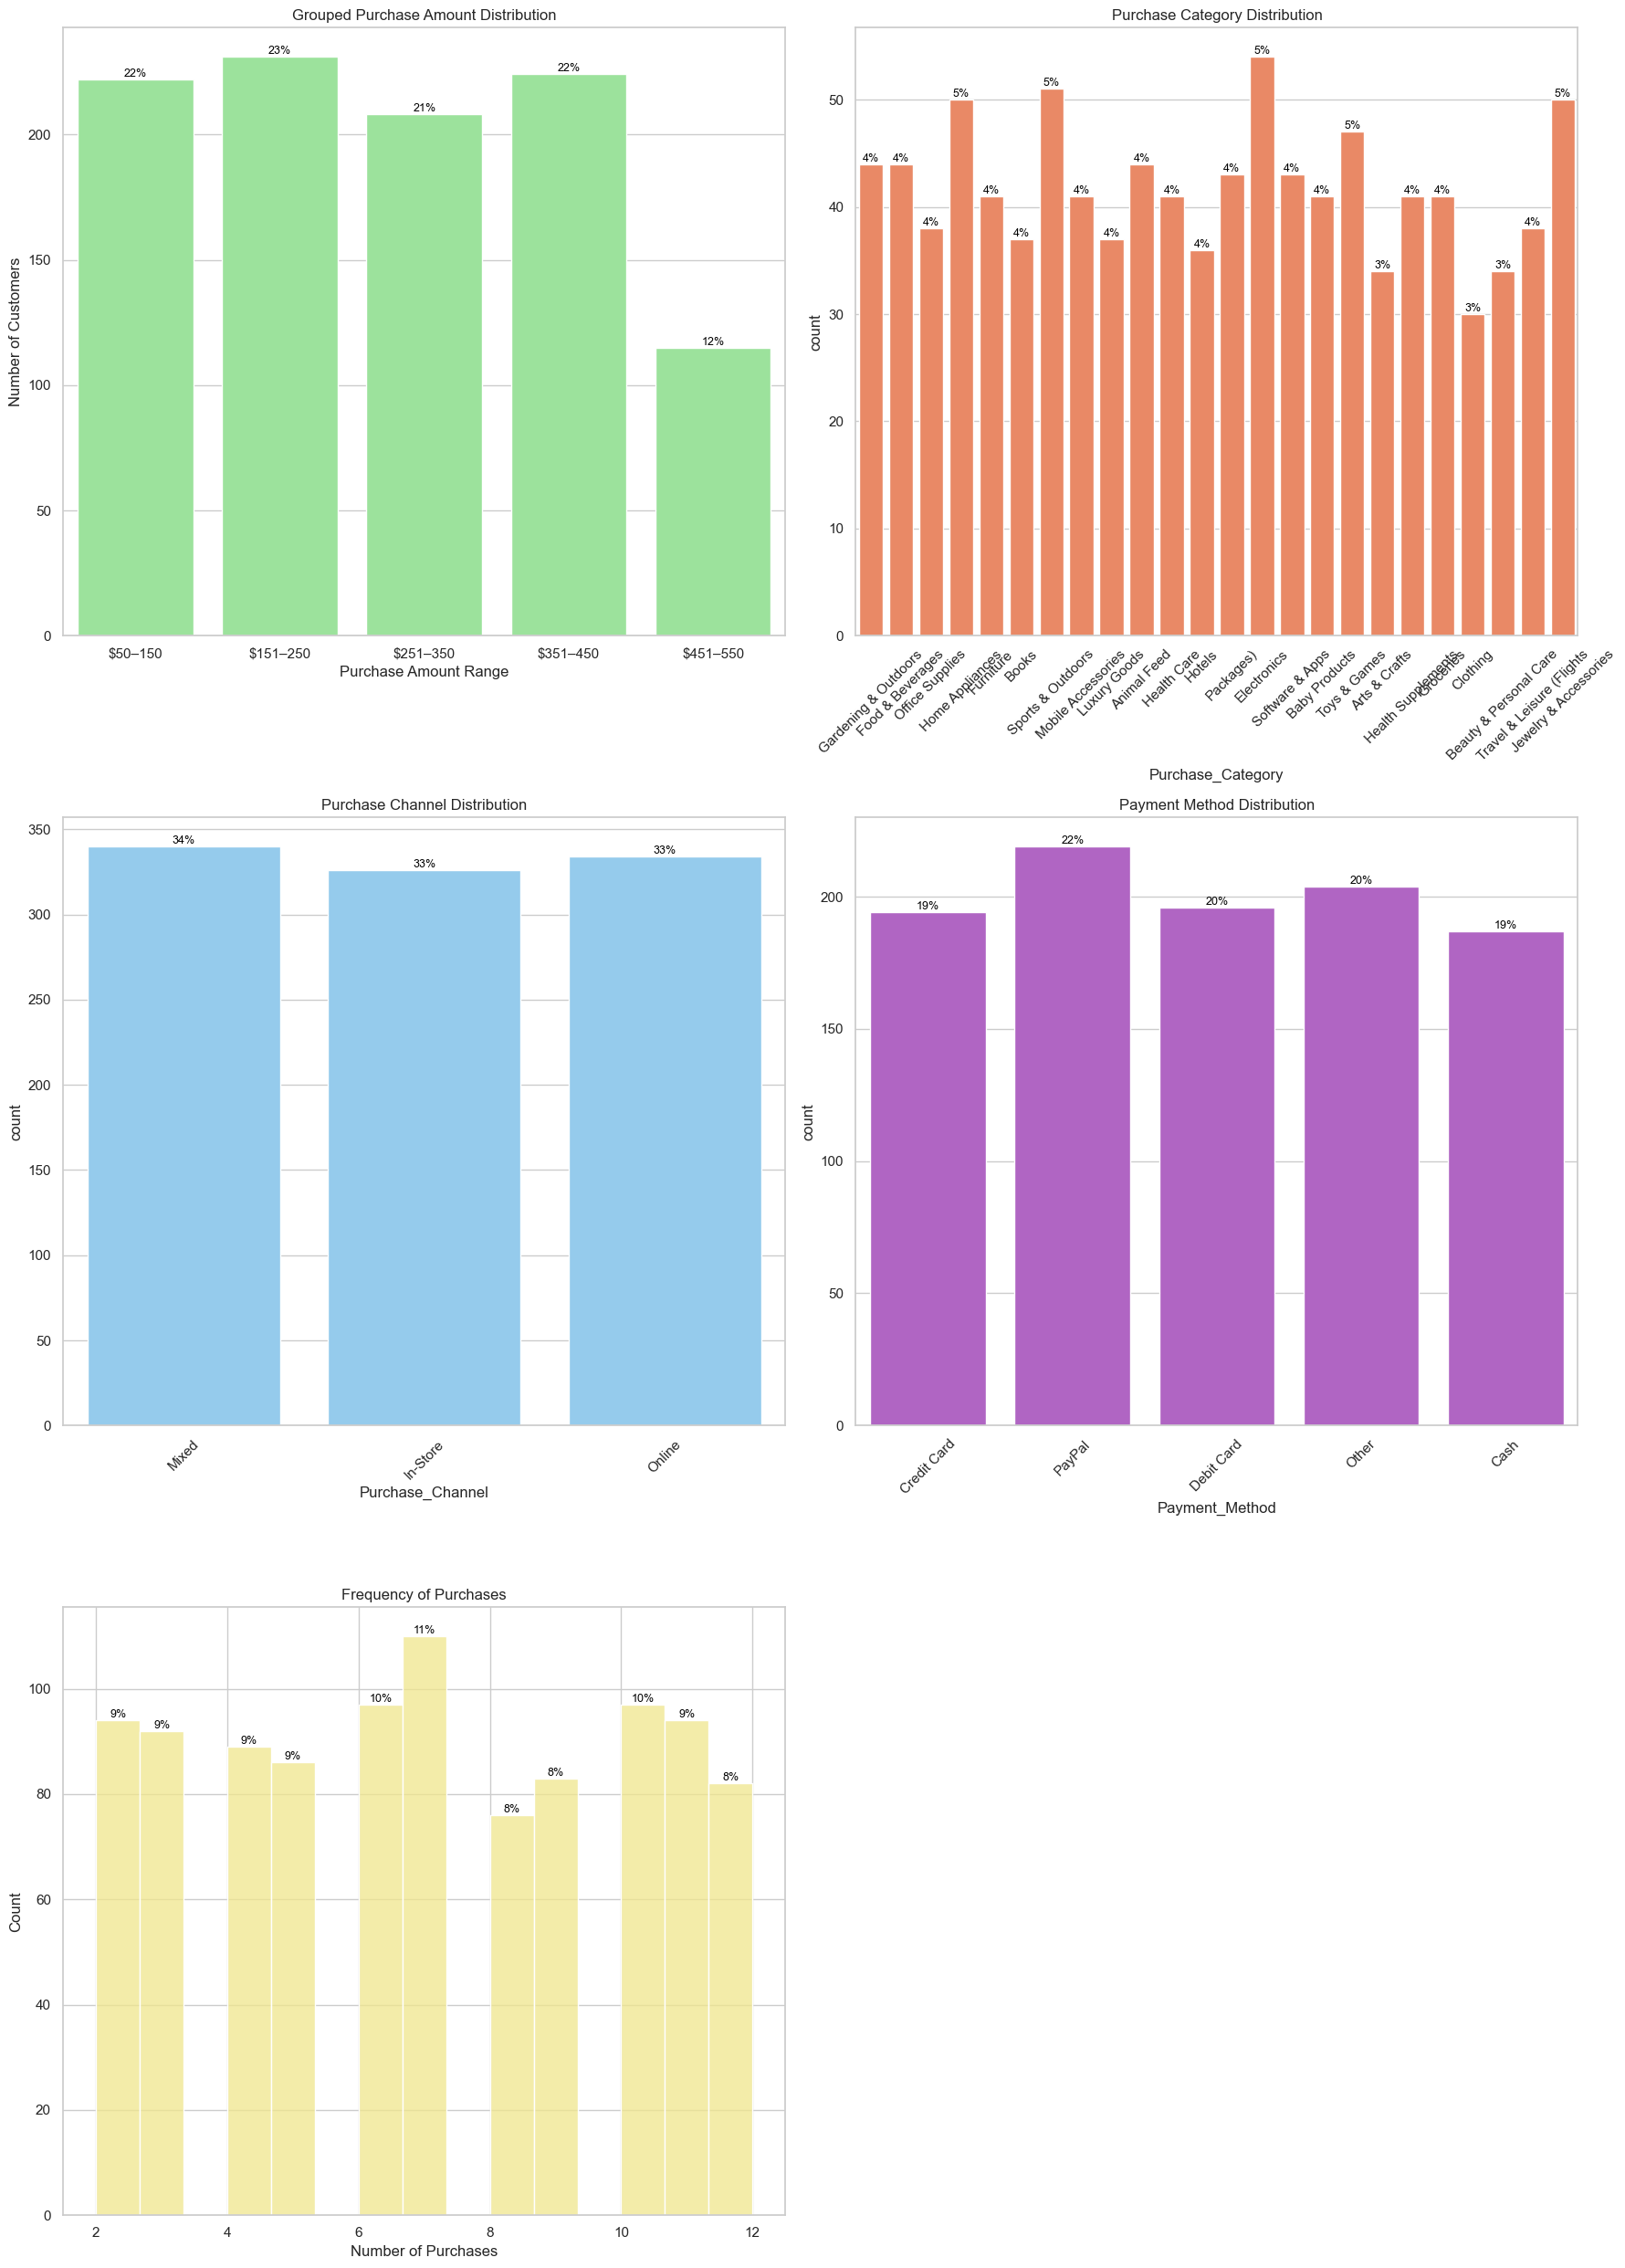

In [20]:
# Clean the Purchase_Amount column (safely using a raw string)
e_commerce['Purchase_Amount'] = e_commerce['Purchase_Amount'].replace(r'[\$,]', '', regex=True).astype(float)

# Create Purchase Amount Groups
purchase_bins = [50, 150, 250, 350, 450, 550]
purchase_labels = ['$50–150', '$151–250', '$251–350', '$351–450', '$451–550']
e_commerce['Purchase_Amount_Group'] = pd.cut(e_commerce['Purchase_Amount'], bins=purchase_bins, labels=purchase_labels)

# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(18, 25))

# Helper function to add % labels
def add_percentage(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percentage = f'{round(100 * height / total_count)}%'
            ax.annotate(percentage,
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9, color='black')

total_users = len(e_commerce)

# Plot 1: Grouped Purchase Amount Distribution
plt.subplot(3, 2, 1)
ax1 = sns.countplot(data=e_commerce, x='Purchase_Amount_Group', color='lightgreen', order=purchase_labels)
add_percentage(ax1, total_users)
plt.title('Grouped Purchase Amount Distribution')
plt.xlabel('Purchase Amount Range')
plt.ylabel('Number of Customers')

# Plot 2: Purchase Category
plt.subplot(3, 2, 2)
ax2 = sns.countplot(data=e_commerce, x='Purchase_Category', color='coral')
add_percentage(ax2, total_users)
plt.title('Purchase Category Distribution')
plt.xticks(rotation=45)

# Plot 3: Purchase Channel
plt.subplot(3, 2, 3)
ax3 = sns.countplot(data=e_commerce, x='Purchase_Channel', color='lightskyblue')
add_percentage(ax3, total_users)
plt.title('Purchase Channel Distribution')
plt.xticks(rotation=45)

# Plot 4: Payment Method
plt.subplot(3, 2, 4)
ax4 = sns.countplot(data=e_commerce, x='Payment_Method', color='mediumorchid')
add_percentage(ax4, total_users)
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)

# Plot 5: Frequency of Purchases (numeric histogram with % labels)
plt.subplot(3, 2, 5)
ax5 = sns.histplot(data=e_commerce, x='Frequency_of_Purchase', bins=15, kde=False, color='khaki')
for bar in ax5.patches:
    height = bar.get_height()
    if height > 0:
        percentage = f'{round(100 * height / total_users)}%'
        ax5.annotate(percentage,
                     (bar.get_x() + bar.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=9, color='black')

plt.title('Frequency of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Key conclusions that could be important later, when evaluating fairness in recommender system outputs:
- There is a relatively even distribution of customers across most purchase amounts, but a lower proportion of customers fall within the highest spending range.
- The purchase categories are relatively evenly distributed, with no particular category overwhelmingly more popular than others, indicating a diverse range of interests among the customers.
- Customers are evenly distributed across the three purchase channels, indicating no strong preference for one channel over another.
- The payment method distribution is fairly balanced, with Credit Card being the most widely used method but PayPal, Debit Card, and others following closely behind.
- There’s no major skew in the number of purchases made, with a small fraction of customers making more purchases (6, 8, 10) and fewer customers making just one or two.

---
Moving on to looking at engagement and loyalty factors:
- Brand loyalty
- Engagement with the ads
- Customer loyalty program member
- Customer satisfaction

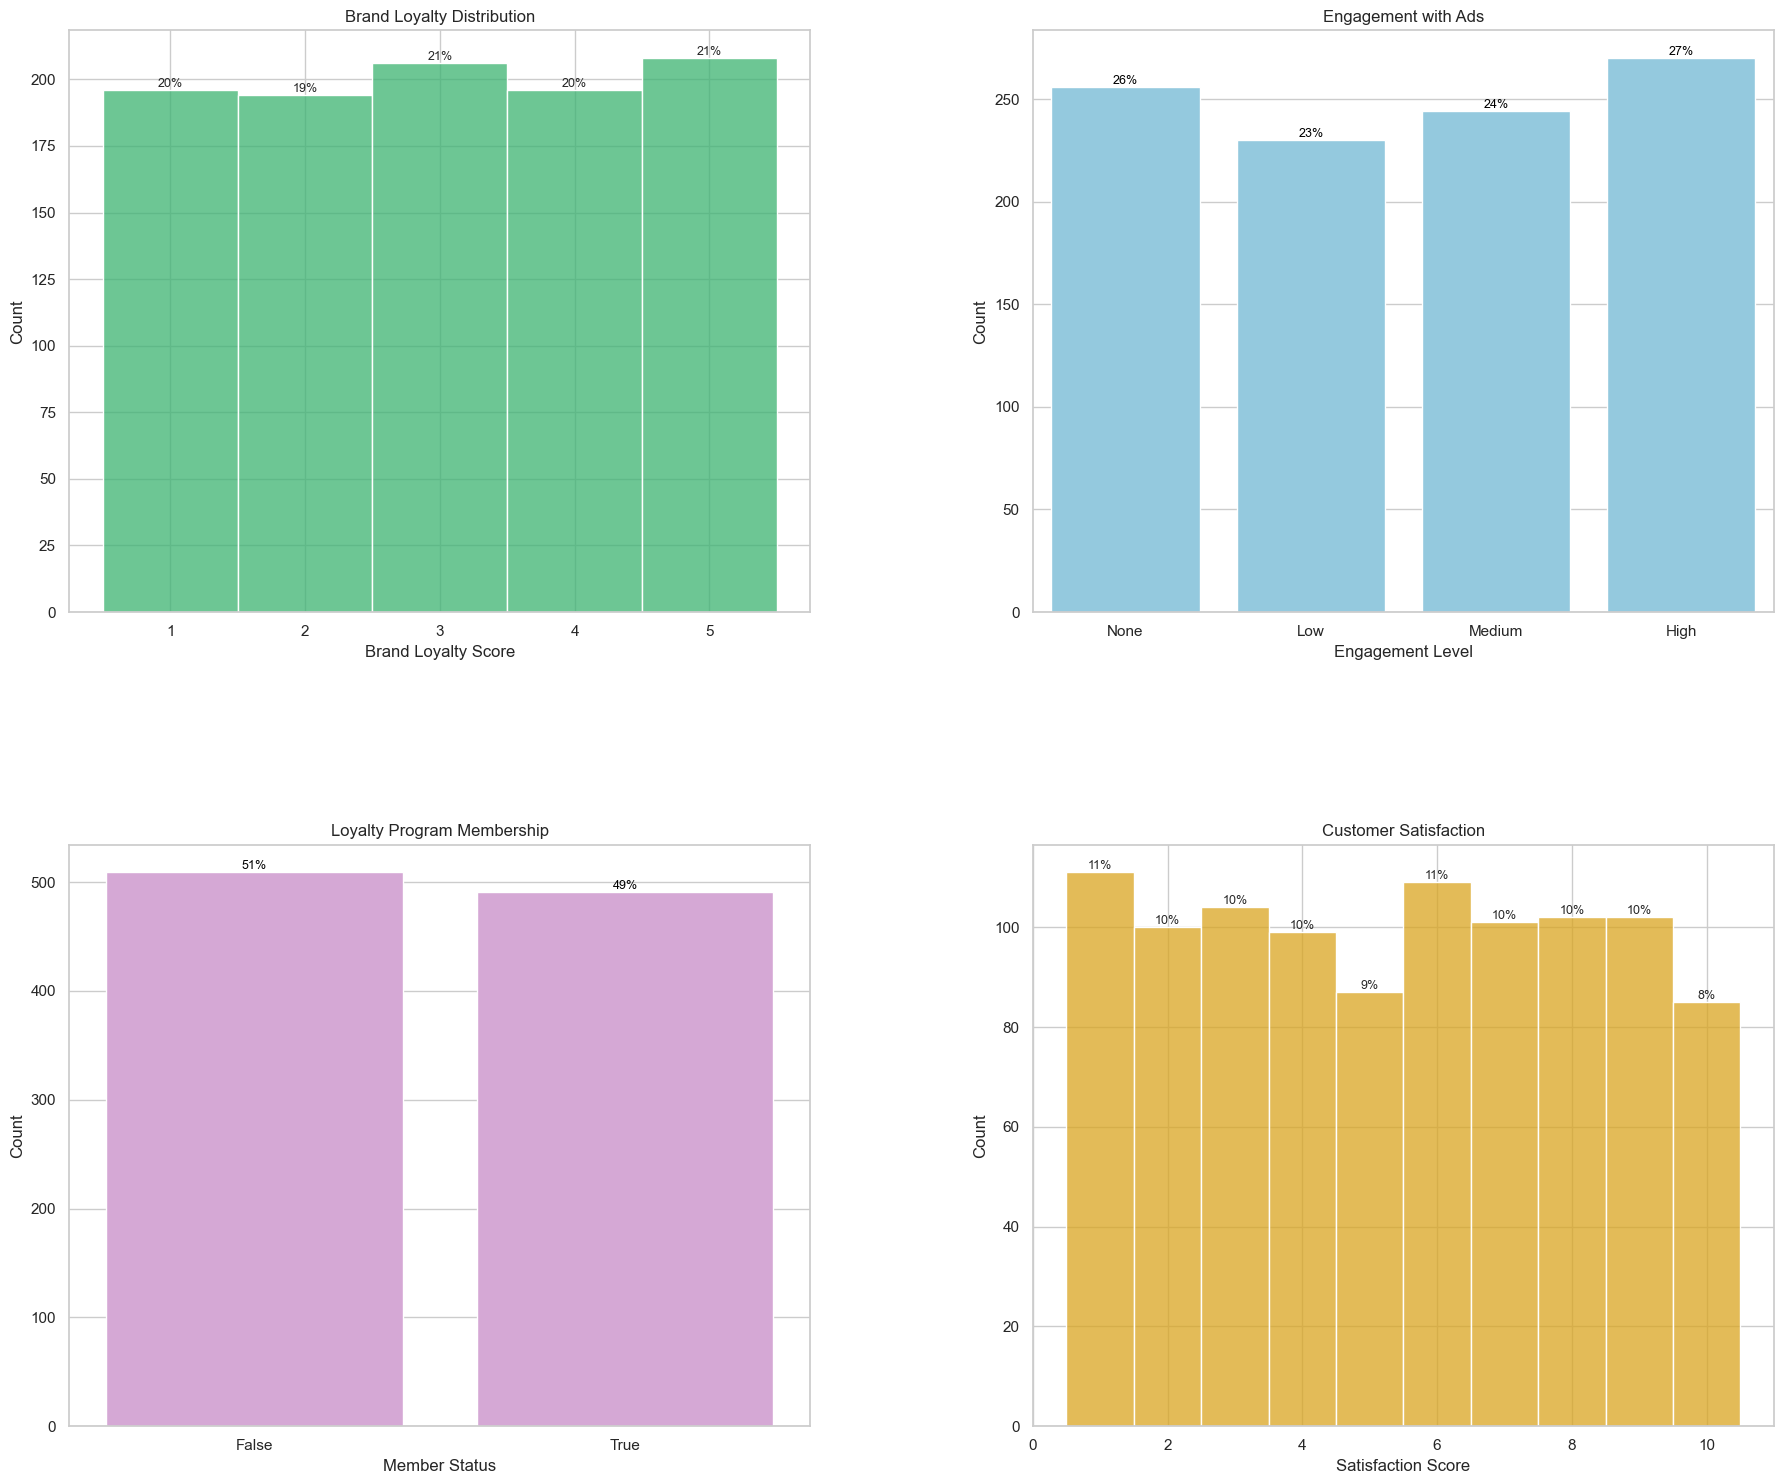

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 15))

# Plot 1: Brand Loyalty
plt.subplot(2, 2, 1)
ax1 = sns.histplot(data=e_commerce, x='Brand_Loyalty', bins=5, color='mediumseagreen', discrete=True)
for bar in ax1.patches:
    height = bar.get_height()
    if height > 0:
        pct = f"{round(100 * height / total_users)}%"
        ax1.annotate(pct, (bar.get_x() + bar.get_width()/2, height), ha='center', va='bottom', fontsize=9)
plt.title('Brand Loyalty Distribution')
plt.xlabel('Brand Loyalty Score')
plt.ylabel('Count')

# Plot 2: Engagement with Ads
plt.subplot(2, 2, 2)
ax2 = sns.countplot(data=e_commerce, x='Engagement_with_Ads', color='skyblue',
                    order=['None', 'Low', 'Medium', 'High'])
add_percentage(ax2, total_users)
plt.title('Engagement with Ads')
plt.xlabel('Engagement Level')
plt.ylabel('Count')

# Plot 3: Loyalty Program Member
plt.subplot(2, 2, 3)
ax3 = sns.countplot(data=e_commerce, x='Customer_Loyalty_Program_Member', color='plum')
add_percentage(ax3, total_users)
plt.title('Loyalty Program Membership')
plt.xlabel('Member Status')
plt.ylabel('Count')

# Plot 4: Customer Satisfaction
plt.subplot(2, 2, 4)
ax4 = sns.histplot(data=e_commerce, x='Customer_Satisfaction', bins=10, color='goldenrod', discrete=True)
for bar in ax4.patches:
    height = bar.get_height()
    if height > 0:
        pct = f"{round(100 * height / total_users)}%"
        ax4.annotate(pct, (bar.get_x() + bar.get_width()/2, height), ha='center', va='bottom', fontsize=9)
plt.title('Customer Satisfaction')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

Key insights and conclusions:
- Customers are somewhat spread across all levels of brand loyalty, but there's no overwhelming trend toward higher or lower loyalty. 
- The distribution of engagement with ads is very balanced, with no extreme dominance by any specific category. All categories (None, Low, Medium, High) are relatively close to each other, with the percentages varying by only a few percentage points.
- Most customers seem to have at least some level of engagement with ads, with high engagement being the most common. This indicates that advertising might play a significant role in influencing customer behavior, and further attention could be paid to improving ad targeting to maintain or increase engagement.
- Customers tend to rate their satisfaction on the higher end (6 to 8), suggesting generally positive experiences with the brand or service. However, the low score (2) and high score (10) are much less frequent, indicating that extreme dissatisfaction and extreme satisfaction are both less common among the customer base.
- There's almost an even split between customers who are part of the loyalty program and those who are not and the distribution is fairly even across all scores, from 0 to 10.

---
Lets move on to look at the behavioral insights:
- Time spend on product research (hours)
- Time to decide
- Purchase intent
- Shipping preferences

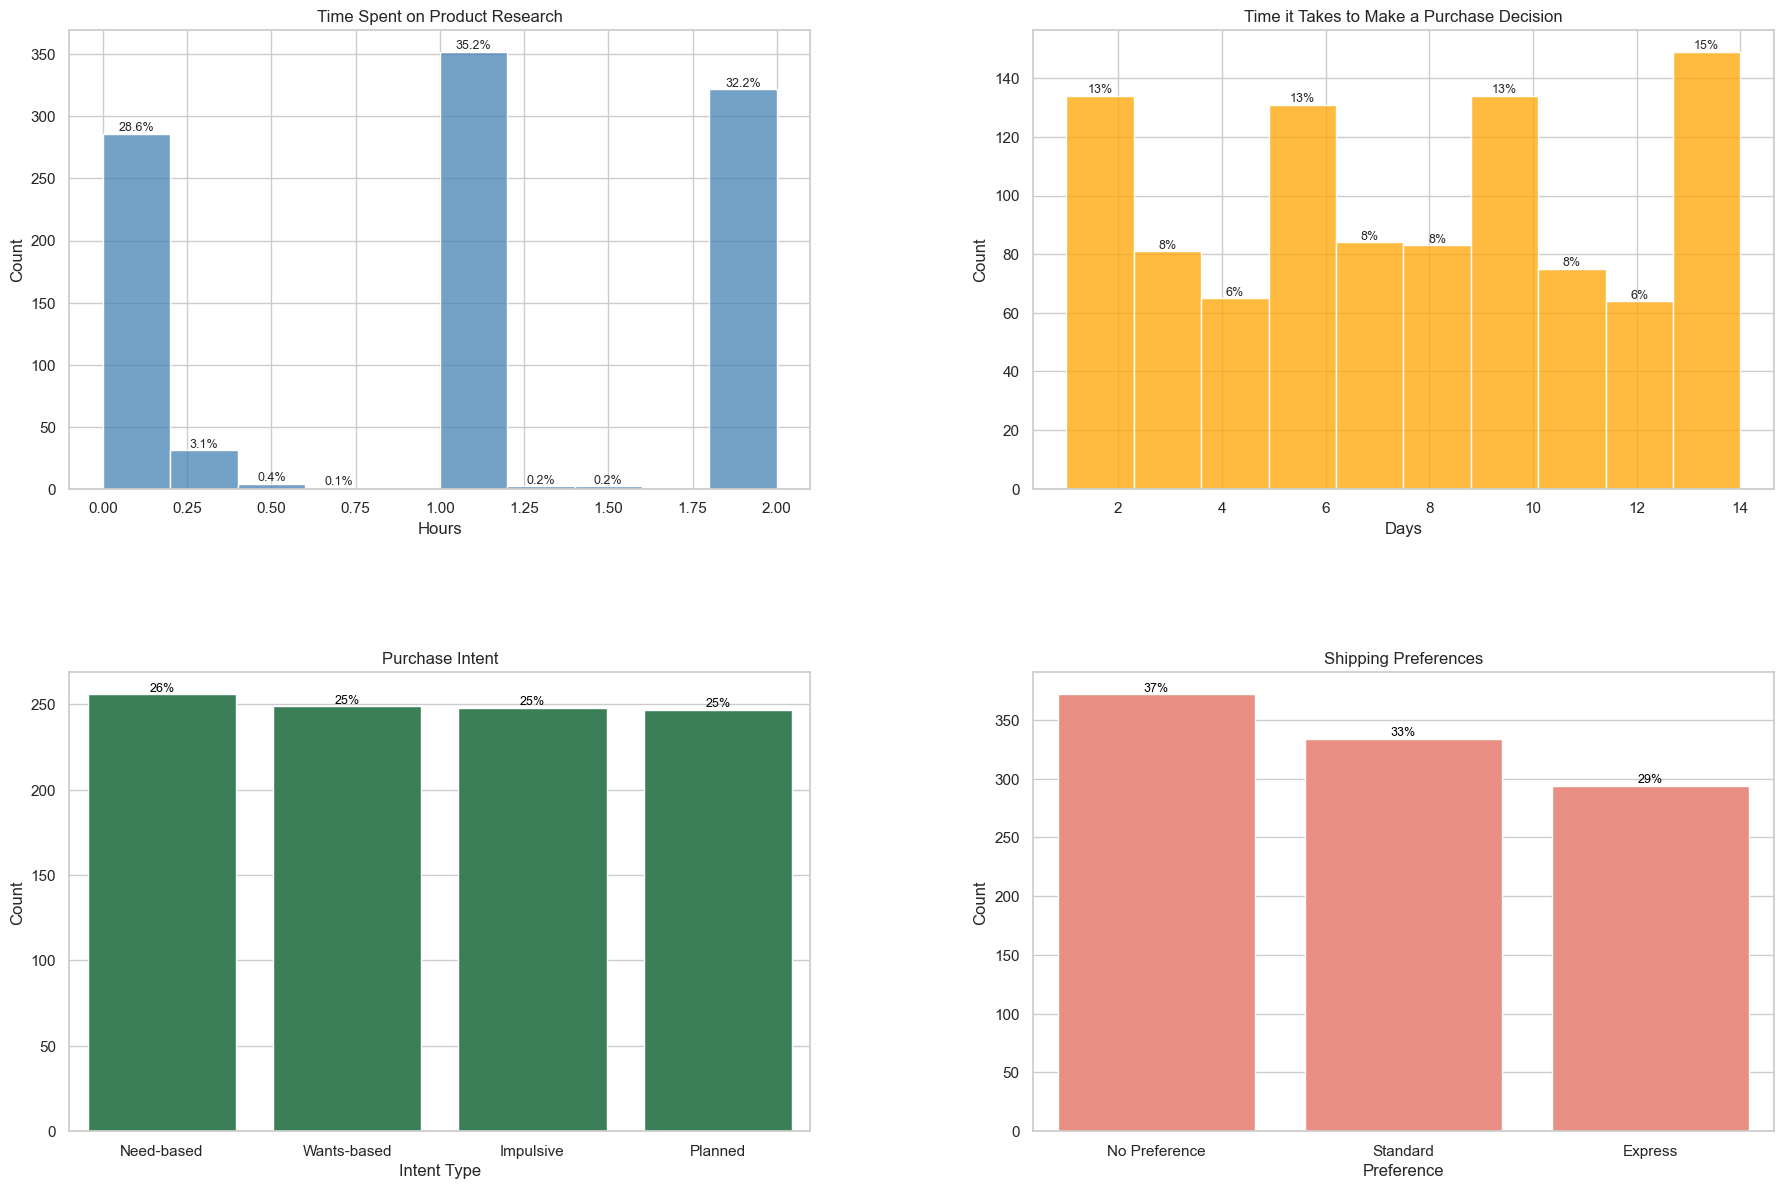

In [22]:
plt.figure(figsize=(18, 18))

# 1. Time Spent on Product Research
plt.subplot(3, 2, 1)
ax1 = sns.histplot(data=e_commerce, x='Time_Spent_on_Product_Research(hours)', bins=10, color='steelblue')
for bar in ax1.patches:
    height = bar.get_height()
    if height > 0:
        pct = f'{100 * height / total_users:.1f}%'
        ax1.annotate(pct, (bar.get_x() + bar.get_width()/2, height), ha='center', va='bottom', fontsize=9)
plt.title('Time Spent on Product Research')
plt.xlabel('Hours')
plt.ylabel('Count')

# 2. Time to Decision
plt.subplot(3, 2, 2)
ax2 = sns.histplot(data=e_commerce, x='Time_to_Decision', bins=10, color='orange')
for bar in ax2.patches:
    height = bar.get_height()
    if height > 0:
        pct = f'{round(100 * height / total_users)}%'
        ax2.annotate(pct, (bar.get_x() + bar.get_width()/2, height), ha='center', va='bottom', fontsize=9)
plt.title('Time it Takes to Make a Purchase Decision')
plt.xlabel('Days')
plt.ylabel('Count')

# 3. Purchase Intent
plt.subplot(3, 2, 3)
ax3 = sns.countplot(data=e_commerce, x='Purchase_Intent', color='seagreen')
add_percentage(ax3, total_users)
plt.title('Purchase Intent')
plt.xlabel('Intent Type')
plt.ylabel('Count')

# 4. Shipping Preference
plt.subplot(3, 2, 4)
ax4 = sns.countplot(data=e_commerce, x='Shipping_Preference', color='salmon')
add_percentage(ax4, total_users)
plt.title('Shipping Preferences')
plt.xlabel('Preference')
plt.ylabel('Count')

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

Key insights and conclusions:
- Most customers are either browsing quickly or dedicating 1 or 2 hours to research. A majority of customers seem to also make decisions relatively quickly (2-8 days), but a segment of customers takes longer (12–14 days).
- The purchase itent is evenly distributed across all intents.
- A large portion of customers do not have strong preferences regarding shipping. Standard shipping is preferred over express indicating that speed is not a significant concern for many buyers, or they are indifferent about shipping times.

---
Then lastly looking at other influencing factors:
- Social media influence
- Discount sensitivity

([0, 1, 2],
 [Text(0, 0, 'Somewhat Sensitive'),
  Text(1, 0, 'Not Sensitive'),
  Text(2, 0, 'Very Sensitive')])

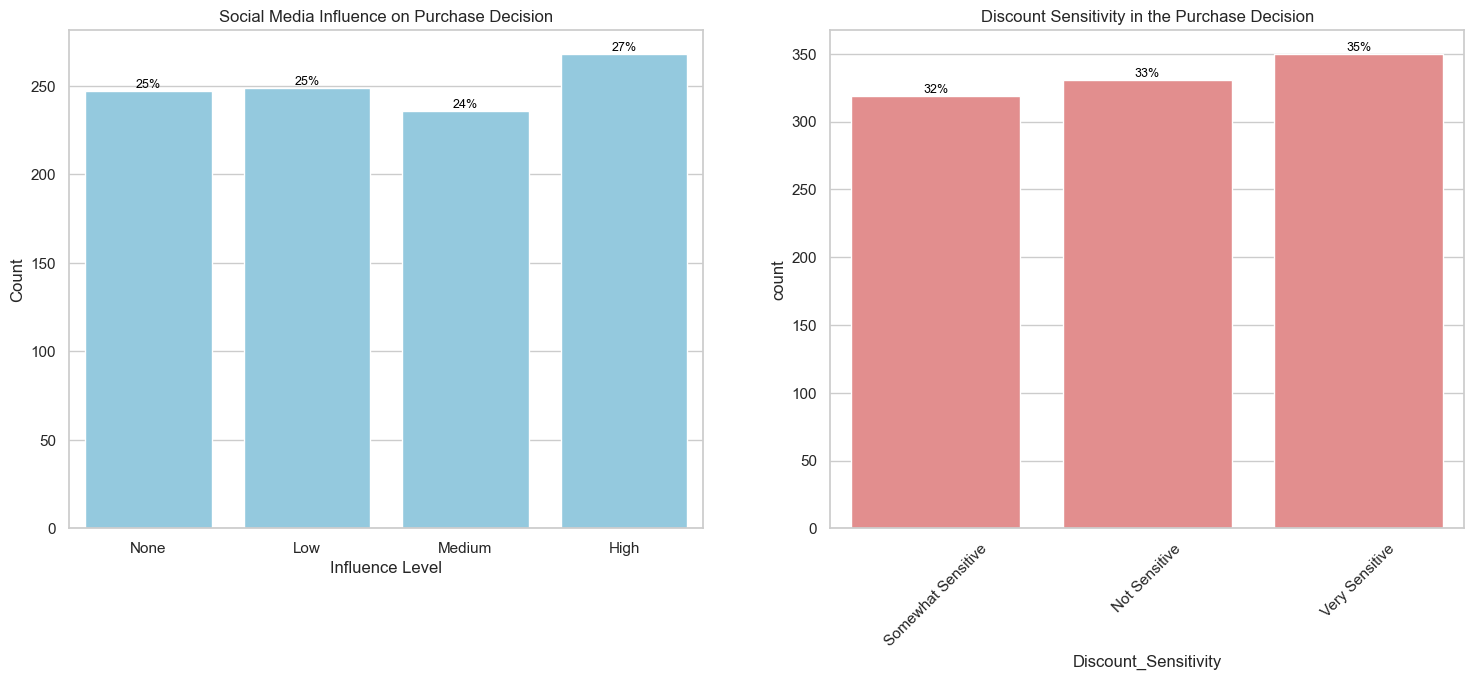

In [23]:
plt.figure(figsize=(18, 22))

# 1. Social Media Influence
plt.subplot(3, 2, 1)
ax1 = sns.countplot(data=e_commerce, x='Social_Media_Influence', order=['None', 'Low', 'Medium', 'High'], color='skyblue')
add_percentage(ax1, total_users)
plt.title('Social Media Influence on Purchase Decision')
plt.xlabel('Influence Level')
plt.ylabel('Count')

# 2. Discount Sensitivity
plt.subplot(3, 2, 2)
ax2 = sns.countplot(data=e_commerce, x='Discount_Sensitivity', color='lightcoral')
add_percentage(ax2, total_users)
plt.title('Discount Sensitivity in the Purchase Decision')
plt.xticks(rotation=45)

Key insights and conclusions:
- Social media influence and discounts are distributed quite evenly, indicating that social media and discounts do now influence customers' purchase decisions drastically.

Finally, lets look at the distribution of the product ratings:

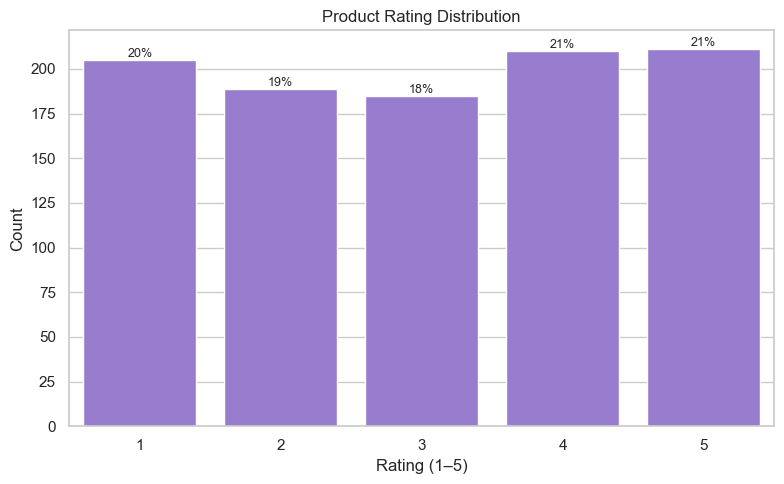

In [24]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Countplot for Product Rating
ax = sns.countplot(data=e_commerce, x='Product_Rating', color='mediumpurple')

# Add percentage labels
total_users = len(e_commerce)
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        pct = f'{round(100 * height / total_users)}%'
        ax.annotate(pct, 
                    (bar.get_x() + bar.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.title('Product Rating Distribution')
plt.xlabel('Rating (1–5)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The distribution shows that the ratings for the product are fairly spread across all five levels.

In [25]:
(e_commerce.head())

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision,Age_Group,Purchase_Amount_Group
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,333.80,4,Mixed,5,5,2.0,None,Somewhat Sensitive,1,7,None,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2,18–25,$251–350
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6,46–50,$151–250
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3,18–25,$351–450
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,None,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10,26–30,$50–150
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,None,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4,31–35,$151–250


The correlation matrix (from numerical features) helps identify which features are closely related to each other and may have a significant impact on the target variable. It is important to look if there are highly correlated features which need to be excluded:

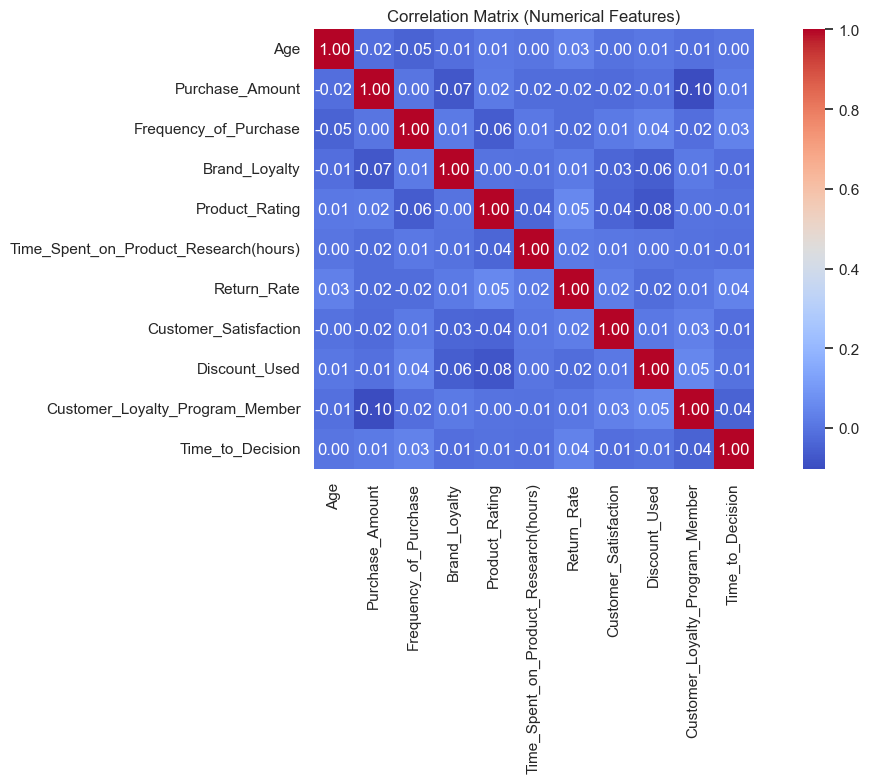

In [26]:
# Select only numeric columns
numeric_cols = e_commerce.select_dtypes(include=['int64', 'float64', 'bool'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Numerical Features)')
plt.tight_layout()
plt.show()

A Few Observations:
- Most values are between -0.1 and 0.1, which means very little linear relationship among most variables.
- Brand_Loyalty has a small positive correlation with Product_Rating (0.06) and a slight negative correlation with Discount_Used (-0.08). This could suggest that loyal customers care less about discounts.
- Customer_Satisfaction has a low positive correlation with Product_Rating (0.12) and a slight positive correlation with Brand_Loyalty and Return_Rate (0.10). This might indicate that even returning customers may still be satisfied, depending on service.
- Time_to_Decision is vry weakly correlated with anything, which could be an independent behavior trait (e.g., decision speed isn't tightly linked to satisfaction or purchase amount).

---
Checking possible outliers even though the data seems clean.

Most Relevant Variables to Check Outliers For:
- Purchase_Amount – High-value outliers can heavily bias models, especially if weighted.
- Frequency_of_Purchase – Unusually high frequency may represent bots or power users.
- Time_to_Decision – Super long decision times might be noise or irrelevant.
- Time_Spent_on_Product_Research(hours) – Important for modeling intent or engagement.
- Product_Rating – Even if bounded (1–5), look for rating distributions that may be skewed.
- Customer_Satisfaction – If used for personalized ranking or feedback learning.



In [27]:
# List of variables to check for outliers
target_columns = [
    'Purchase_Amount',
    'Frequency_of_Purchase',
    'Time_to_Decision',
    'Time_Spent_on_Product_Research(hours)',
    'Product_Rating',
    'Customer_Satisfaction'
]

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Run outlier check for each selected variable
for col in target_columns:
    outliers, lower, upper = detect_outliers_iqr(e_commerce, col)
    print(f"\n{col}")
    print(f"Lower Bound: {lower:.2f}")
    print(f"Upper Bound: {upper:.2f}")
    print(f"Number of Outliers: {len(outliers)}")


Purchase_Amount
Lower Bound: -177.89
Upper Bound: 729.10
Number of Outliers: 0

Frequency_of_Purchase
Lower Bound: -5.00
Upper Bound: 19.00
Number of Outliers: 0

Time_to_Decision
Lower Bound: -6.50
Upper Bound: 21.50
Number of Outliers: 0

Time_Spent_on_Product_Research(hours)
Lower Bound: -3.00
Upper Bound: 5.00
Number of Outliers: 0

Product_Rating
Lower Bound: -1.00
Upper Bound: 7.00
Number of Outliers: 0

Customer_Satisfaction
Lower Bound: -4.50
Upper Bound: 15.50
Number of Outliers: 0


No need to handle outliers:
- The absence of outliers in these features indicates that the data doesn't contain extreme values outside of the expected range (according to the defined bounds).

In [28]:
(e_commerce.head())

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision,Age_Group,Purchase_Amount_Group
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,333.80,4,Mixed,5,5,2.0,None,Somewhat Sensitive,1,7,None,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2,18–25,$251–350
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6,46–50,$151–250
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3,18–25,$351–450
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,None,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10,26–30,$50–150
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,None,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4,31–35,$151–250


Downloading the EDA dataframe for modelling in another file:

In [29]:
e_commerce.to_csv('ecommerce_data.csv', index=False)